# Face Recognition using CNN

 # Step1:
 
At the first, you should input the required libraries:

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

# Step2:

* Load Dataset :

After loading the Dataset you have to normalize every image.

Note: an image is a Uint8 matrix of pixels and for calculation, you need to convert the format of the image to float or double

In [4]:
#load dataset
data = np.load('C:/Users/vaibh/OneDrive/Desktop/Face Recognition using CNN/ORL CNN Code/ORL_faces/ORL_faces.npz') 

# load the "Train Images"
x_train = data['trainX']
# Normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

# show the train and test Data format
print('x_train : {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))

x_train : (240, 10304)
y_train shape: (240,)
x_test shape: (160, 10304)
y_test shape: (160,)


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im

data = x_train[0]

In [6]:
data.shape

(10304,)

In [7]:
data_1 = data.reshape(112,92)
data_1 = im.fromarray(np.uint8(data_1 * 255) , 'L')
data_1.show()

# Step 3

Split DataSet : Validation data and Train 

Validation DataSet: this data set is used to minimize overfitting.If the accuracy over the training data set increases, but the accuracy over then validation data set stays the same or decreases, then you're overfitting your neural network and you should stop training.

 * Note: we usually use 30 percent of every dataset as the validation data but Here we only used 5 percent because the number of images in this dataset is very low. 



In [8]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,)

# Step 4

for using the CNN, we need to change The size of images ( The size of images must be the same)

In [9]:
im_rows=112
im_cols=92
batch_size=512
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('Number of Training images: {}'.format(y_train.shape[0]))
print('Number of Testing images: {}'.format(y_test.shape[0]))

Number of Training images: 228
Number of Testing images: 160


# Step 5


Build CNN model:
 CNN have 3 main layer: 
 * 1-Convolotional layer 
 * 2- pooling layer  
 * 3- fully connected layer
 
 we could build a new architecture of CNN by changing the number and position of layers.
 

In [12]:
cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

Show the model's parameters.

In [13]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 19, 54)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 24624)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 2024)              49841000  
_________________________________________________________________
dropout_3 (Dropout)          (None, 2024)             

# Step 6

Train the Model

* Note: You can change the number of epochs


In [14]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=150, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/150
1/1 - 0s - loss: 2.9988 - accuracy: 0.0658 - val_loss: 2.9868 - val_accuracy: 0.0000e+00
Epoch 2/150
1/1 - 0s - loss: 2.9995 - accuracy: 0.0570 - val_loss: 2.9992 - val_accuracy: 0.0833
Epoch 3/150
1/1 - 0s - loss: 2.9833 - accuracy: 0.0833 - val_loss: 3.0003 - val_accuracy: 0.0000e+00
Epoch 4/150
1/1 - 0s - loss: 3.0074 - accuracy: 0.0614 - val_loss: 3.0001 - val_accuracy: 0.1667
Epoch 5/150
1/1 - 0s - loss: 2.9850 - accuracy: 0.0746 - val_loss: 2.9996 - val_accuracy: 0.1667
Epoch 6/150
1/1 - 0s - loss: 2.9908 - accuracy: 0.0746 - val_loss: 2.9996 - val_accuracy: 0.0833
Epoch 7/150
1/1 - 0s - loss: 3.0242 - accuracy: 0.0482 - val_loss: 3.0023 - val_accuracy: 0.0833
Epoch 8/150
1/1 - 0s - loss: 2.9848 - accuracy: 0.0614 - val_loss: 3.0033 - val_accuracy: 0.0833
Epoch 9/150
1/1 - 0s - loss: 2.9821 - accuracy: 0.0746 - val_loss: 3.0026 - val_accuracy: 0.0833
Epoch 10/150
1/1 - 0s - loss: 2.9768 - accuracy: 0.0746 - val_loss: 3.0021 - val_accuracy: 0.0833
Epoch 11/150
1/1 - 0s

Epoch 85/150
1/1 - 0s - loss: 0.5634 - accuracy: 0.8553 - val_loss: 0.2917 - val_accuracy: 0.9167
Epoch 86/150
1/1 - 0s - loss: 0.6266 - accuracy: 0.8070 - val_loss: 0.2556 - val_accuracy: 1.0000
Epoch 87/150
1/1 - 0s - loss: 0.5806 - accuracy: 0.8158 - val_loss: 0.2275 - val_accuracy: 1.0000
Epoch 88/150
1/1 - 0s - loss: 0.5572 - accuracy: 0.8509 - val_loss: 0.2140 - val_accuracy: 1.0000
Epoch 89/150
1/1 - 0s - loss: 0.4819 - accuracy: 0.8728 - val_loss: 0.2117 - val_accuracy: 1.0000
Epoch 90/150
1/1 - 0s - loss: 0.4351 - accuracy: 0.8728 - val_loss: 0.2206 - val_accuracy: 1.0000
Epoch 91/150
1/1 - 0s - loss: 0.5071 - accuracy: 0.8465 - val_loss: 0.2207 - val_accuracy: 1.0000
Epoch 92/150
1/1 - 0s - loss: 0.4673 - accuracy: 0.8553 - val_loss: 0.1929 - val_accuracy: 1.0000
Epoch 93/150
1/1 - 0s - loss: 0.4361 - accuracy: 0.8728 - val_loss: 0.1735 - val_accuracy: 1.0000
Epoch 94/150
1/1 - 0s - loss: 0.4222 - accuracy: 0.8860 - val_loss: 0.1663 - val_accuracy: 1.0000
Epoch 95/150
1/1 - 0

Evaluate the test data


In [17]:
scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('Test Loss {:.2f}'.format(scor[0]))
print('Test Accuracy {:.2f}'.format(scor[1]))

Test Loss 0.32
Test Accuracy 0.94


# Step 7 

plot the result

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


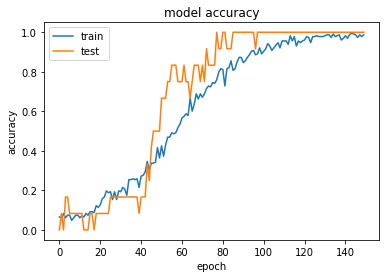

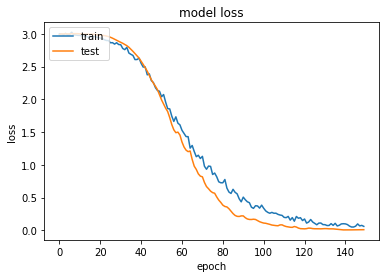

In [21]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# step 8

Plot Confusion Matrix

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy : 
0.9375
Confusion matrix, without normalization
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0

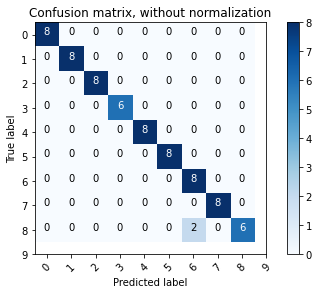

Confusion matrix, without normalization


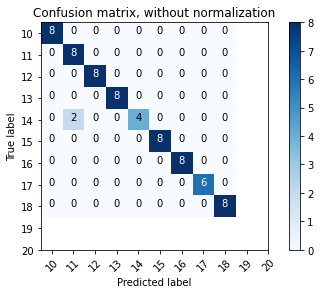

Confusion matrix:
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 4 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1

In [22]:
predicted =np.array(cnn_model.predict(x_test))
#print(predicted)
#print(y_test)
ynew = cnn_model.predict_classes(x_test)


Acc=accuracy_score(y_test, ynew)
print("Accuracy : ")
print(Acc)
#/tn, fp, fn, tp = confusion_matrix(np.array(y_test), ynew).ravel()
cnf_matrix=confusion_matrix(np.array(y_test), ynew)

y_test1 = np_utils.to_categorical(y_test, 40)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


print('Confusion matrix, without normalization')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19,20],
                      title='Confusion matrix, without normalization')

print("Confusion matrix:\n%s" % confusion_matrix(np.array(y_test), ynew))
print(classification_report(np.array(y_test), ynew))